2.1 Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

2.2 Data Preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

df = pd.read_csv(data)

df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [3]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [4]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [6]:
df.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135


2.3 Exploratory data analysis

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribiution of price

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

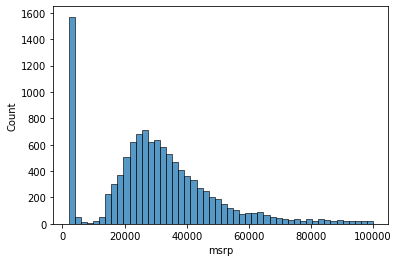

In [9]:
sns.histplot(df.msrp[df.msrp<100000],bins=50);

<AxesSubplot:xlabel='msrp', ylabel='Count'>

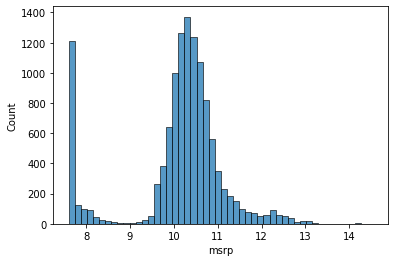

In [10]:
prices_logs = np.log1p(df.msrp)

sns.histplot(prices_logs, bins=50)

Missing values

In [11]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

2.4 Set up the validation framework

In [12]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [13]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [14]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [15]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [16]:
np.random.seed(7)
np.random.shuffle(idx)

In [17]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [18]:
df_train =  df_train.reset_index(drop = True)
df_val =  df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


In [20]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [21]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,mitsubishi,lancer,2016,regular_unleaded,168.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,31,24,436
1,volvo,xc,2002,premium_unleaded_(required),197.0,5.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,wagon,23,17,870
2,maserati,coupe,2005,premium_unleaded_(required),385.0,8.0,manual,rear_wheel_drive,2.0,"exotic,luxury,high-performance",compact,coupe,15,10,238
3,chevrolet,avalanche,2012,flex-fuel_(unleaded/e85),320.0,8.0,automatic,four_wheel_drive,4.0,"crossover,flex_fuel",large,crew_cab_pickup,21,15,1385
4,mitsubishi,outlander_sport,2015,regular_unleaded,168.0,4.0,automatic,four_wheel_drive,4.0,crossover,compact,4dr_suv,26,23,436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,volvo,v60,2016,regular_unleaded,325.0,6.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",midsize,wagon,27,18,870
7146,pontiac,g6,2009,regular_unleaded,164.0,4.0,automatic,front_wheel_drive,4.0,flex_fuel,midsize,sedan,30,22,210
7147,mercedes-benz,g-class,2016,premium_unleaded_(required),563.0,8.0,automatic,four_wheel_drive,4.0,"factory_tuner,luxury",midsize,4dr_suv,14,12,617
7148,toyota,prius,2015,regular_unleaded,134.0,4.0,automatic,front_wheel_drive,4.0,"hatchback,hybrid",compact,4dr_hatchback,48,51,2031


2.5 Linear Regression

In [23]:
df_train.iloc[10]

make                                     volkswagen
model                                        beetle
year                                           2015
engine_fuel_type     premium_unleaded_(recommended)
engine_hp                                     210.0
engine_cylinders                                4.0
transmission_type                            manual
driven_wheels                     front_wheel_drive
number_of_doors                                 2.0
market_category               hatchback,performance
vehicle_size                                compact
vehicle_style                         2dr_hatchback
highway_mpg                                      31
city_mpg                                         23
popularity                                      873
Name: 10, dtype: object

In [49]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]

In [37]:
def linera_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [38]:
linera_regression(xi)

12.312

In [39]:
np.expm1(12.312)

222347.2221101062

In [40]:
np.log1p(222347.2221101062)

12.312

2.6 Linear regression vector form

In [41]:
def dot(xi,w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] *w[j]
    return res

In [43]:
w_new = [w0] + w

In [45]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [46]:

def linera_regression(xi):
    xi = [1] + xi
    return w0 + dot(xi,w_new)

In [48]:
linera_regression(xi)

19.482

In [61]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [60]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x10 = [1,453,11,86]

X = [x1,x2,x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [57]:
def linear_regression(X):
    return X.dot(w_new)

In [58]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

2.7 Training a linear regression model 

In [88]:
X = [
[148,24,1385],
[132,25,2031],
[453,11,86],
[148,24,185],
[132,25,201],
[453,11,86],
[148,54,185],
[142,25,431],
[453,31,86]
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 148,   24,  185],
       [ 132,   25,  201],
       [ 453,   11,   86],
       [ 148,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [77]:
ones = np.ones(X.shape[0])

In [78]:
X = np.column_stack([ones,X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.480e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.480e+02, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [79]:
y = [100,200,150,250,100,200,150,250,120]

In [80]:
XTX = X.T.dot(X)

In [82]:
XTX_inv = np.linalg.inv(XTX)

In [83]:
w_full = XTX_inv.dot(X.T).dot(y)

In [84]:
w0 = w_full[0]
w = w_full[1:]

In [85]:
w0,w

(260.97023420416326, array([-0.15867347, -1.71799353, -0.01776816]))

In [87]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [89]:
train_linear_regression(X,y)

(260.97023420416326, array([-0.15867347, -1.71799353, -0.01776816]))

2.8 Car price baseline model

In [92]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [94]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

In [101]:
X_train = df_train[base].values

In [103]:
X_train = df_train[base].fillna(0).values

In [105]:
w0, w = train_linear_regression(X_train,y_train)

In [107]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

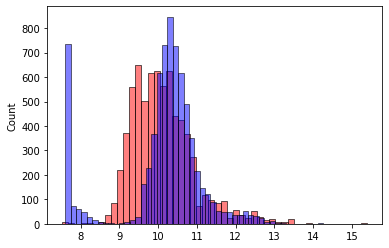

In [111]:
sns.histplot(y_pred,color='red',alpha=0.5,bins=50)
sns.histplot(y_train,color='blue',alpha=0.5,bins=50)

2.9 RMSE

In [114]:
def rmse(y,y_train):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)
    

In [115]:
rmse(y_train,y_pred)

0.7587210098055623

2.10 Validation

In [116]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_train.dot(w)

In [119]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [122]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 +X_val.dot(w)

rmse(y_val,y_pred)

0.7480177227217237

2.11 Simple feature engineering